In [1]:
!pip install opendatasets



In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009')

100%|█████████████████████████████████████████████████████████████████████████████| 25.6k/25.6k [00:00<00:00, 1.68MB/s]

In [6]:
import pandas as pd
wine=pd.read_csv('./red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [7]:
from sklearn.model_selection import train_test_split
wine_train, wine_test = train_test_split(wine, test_size=50, random_state=1,stratify=wine["quality"])
wine_train["quality"].value_counts().sort_index(ascending=False) 

8     17
7    193
6    618
5    660
4     51
3     10
Name: quality, dtype: int64

## Wielkość zbioru i podzbiorów

#### Dla całego zbioru

In [8]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
wine["quality"].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

<AxesSubplot:>

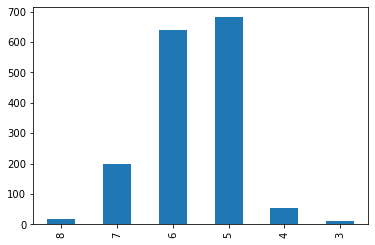

In [11]:
wine["quality"].value_counts().sort_index(ascending=False).plot(kind="bar")

#### Dla podzbioru *train*

In [12]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1453            7.6              0.49         0.33             1.9      0.074   
1295            6.6              0.63         0.00             4.3      0.093   
778             8.3              0.43         0.30             3.4      0.079   
692             8.6              0.49         0.51             2.0      0.422   
166             6.8              0.64         0.10             2.1      0.085   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1453                 27.0                  85.0  0.99706  3.41       0.58   
1295                 51.0                  77.5  0.99558  3.20       0.45   
778                   7.0                  34.0  0.99788  3.36       0.61   
692                  16.0                  62.0  0.99790  3.03       1.17   
166                  18.0                 101.0  0.99560  3.34       0.52   

      alcohol  quality  
1453      9.0        5  
1295      9.5        5  
778      10.5        5  
692       9.0        5  
166      10.2        5

In [13]:
wine_train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1549.000000       1549.000000  1549.000000     1549.000000   
mean        8.327566          0.528128     0.271252        2.529987   
std         1.744692          0.180152     0.194249        1.380202   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     0.790000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1549.000000          1549.000000           1549.000000  1549.000000   
mean      0.086944            15.832150             46.415107     0.996746   
std       0.043732            10.450522             32.884454     0.001877   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            13.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997860   
max       0.467000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1549.000000  1549.000000  1549.000000  1549.000000  
mean      3.310484     0.656727    10.419141     5.635249  
std       0.154269     0.166558     1.067245     0.807313  
min       2.860000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.100000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     1.980000    14.900000     8.000000

In [14]:
wine_train["quality"].value_counts().sort_index(ascending=False) #indexy oznaczają jakość wina

8     17
7    193
6    618
5    660
4     51
3     10
Name: quality, dtype: int64

<AxesSubplot:>

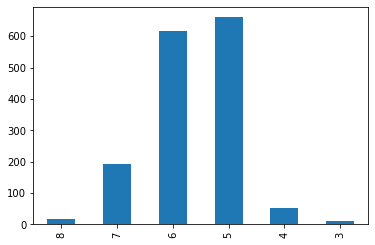

In [15]:
wine_train["quality"].value_counts().sort_index(ascending=False).plot(kind="bar")

#### Dla podzbioru *test*








In [16]:
wine_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
856             9.3              0.36         0.39             1.5      0.080   
1142            6.9              0.45         0.11             2.4      0.043   
538            12.9              0.35         0.49             5.8      0.066   
1324            6.7              0.46         0.24             1.7      0.077   
288             8.7              0.52         0.09             2.5      0.091   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
856                  41.0                  55.0  0.99652  3.47       0.73   
1142                  6.0                  12.0  0.99354  3.30       0.65   
538                   5.0                  35.0  1.00140  3.20       0.66   
1324                 18.0                  34.0  0.99480  3.39       0.60   
288                  20.0                  49.0  0.99760  3.34       0.86   

      alcohol  quality  
856      10.9        6  
1142     11.4        6  
538      12.0        7  
1324     10.6        6  
288      10.6        7

In [17]:
wine_test.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count      50.000000         50.000000    50.000000       50.000000   
mean        8.074000          0.518300     0.262400        2.812000   
std         1.622899          0.142197     0.213155        2.137769   
min         5.600000          0.310000     0.000000        1.500000   
25%         6.900000          0.402500     0.095000        1.900000   
50%         7.650000          0.500000     0.245000        2.200000   
75%         9.150000          0.625000     0.400000        2.675000   
max        12.900000          0.980000     1.000000       15.400000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count   50.00000            50.000000             50.000000  50.000000   
mean     0.10364            17.200000             48.100000   0.996779   
std      0.10746            10.777906             33.525653   0.002199   
min      0.03800             3.000000              8.000000   0.992920   
25%      0.07325            10.000000             25.250000   0.995445   
50%      0.08000            15.000000             36.500000   0.996560   
75%      0.08625            23.750000             62.000000   0.997600   
max      0.61100            55.000000            143.000000   1.003690   

              pH  sulphates    alcohol    quality  
count  50.000000  50.000000  50.000000  50.000000  
mean    3.330600   0.702200  10.542000   5.660000  
std     0.158338   0.242035   1.018621   0.823383  
min     2.740000   0.370000   9.000000   4.000000  
25%     3.260000   0.590000   9.725000   5.000000  
50%     3.320000   0.655000  10.350000   6.000000  
75%     3.400000   0.770000  11.175000   6.000000  
max     3.710000   2.000000  12.800000   8.000000

In [18]:
wine_test["quality"].value_counts().sort_index(ascending=False) #indexy oznaczają jakość wina

8     1
7     6
6    20
5    21
4     2
Name: quality, dtype: int64

<AxesSubplot:>

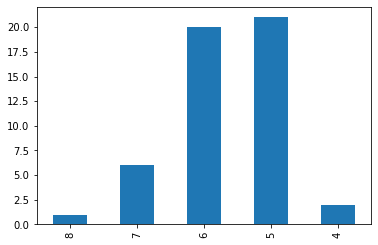

In [19]:
wine_test["quality"].value_counts().sort_index(ascending=False).plot(kind="bar")

## Normalizacja

# Podział z wyróżnieniem data/target

In [20]:
x_train,x_test,y_train,y_test = train_test_split(wine.iloc[:,:-1],wine.iloc[:,-1], test_size=0.2, random_state=1,stratify=wine["quality"])

In [21]:
y_train.value_counts().sum()

1279

In [22]:
y_test.value_counts().sum()

320

## Normalizacja

In [23]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
norm_x_train = norm_fit.transform(x_train)
norm_x_test = norm_fit.transform(x_test)

In [27]:
norm_x_train[:5]

array([[0.31858407, 0.15702479, 0.50632911, 0.0890411 , 0.1010989 ,
        0.07042254, 0.01413428, 0.38839941, 0.39130435, 0.21212121,
        0.43076923],
       [0.26548673, 0.14049587, 0.62025316, 0.12328767, 0.17582418,
        0.33802817, 0.19081272, 0.51615272, 0.39130435, 0.16969697,
        0.26153846],
       [0.23893805, 0.17355372, 0.59493671, 0.08219178, 0.14285714,
        0.05633803, 0.01766784, 0.42070485, 0.40869565, 0.12121212,
        0.29230769],
       [0.19469027, 0.31404959, 0.13924051, 0.04109589, 0.13846154,
        0.21126761, 0.15194346, 0.39500734, 0.43478261, 0.27878788,
        0.16923077],
       [0.27433628, 0.65702479, 0.15189873, 0.0890411 , 0.28791209,
        0.08450704, 0.06007067, 0.46475771, 0.42608696, 0.19393939,
        0.27692308]])

## Nie ma żadnych null'i do wypełnienia

In [24]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64